In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [18]:
len(mnist['data'])

70000

In [9]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
X, y = mnist['data'], mnist['target']

In [28]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
import numpy as np

y = y.astype(np.uint8)

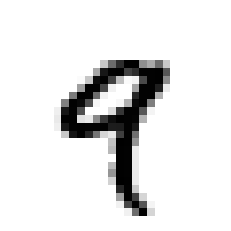

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[4]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='none')
plt.axis('off')
plt.show()

In [27]:
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [26]:
len(X[1])

784

In [20]:
len(X[4])

784

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [15]:
# TRAIN SET

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train_9)

RandomForestClassifier()

In [16]:
print("Prediction in training set:",forest_clf.predict([some_digit]))

Prediction in training set: [ True]


In [57]:
#TEST SET

forest_clf.fit(X_test, y_test_9)

RandomForestClassifier()

In [58]:
print("Prediction in testing set:",forest_clf.predict([some_digit]))

Prediction in testing set: [ True]


In [63]:
from sklearn.model_selection import cross_val_predict

y_prob = cross_val_predict(forest_clf, X_train, y_train_9, cv = 3, method = 'predict_proba')

In [71]:
y_scores = y_prob[:,1]

y_scores

array([0.01, 0.  , 0.05, ..., 0.09, 0.03, 0.05])

In [78]:
#Training ROC curve

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

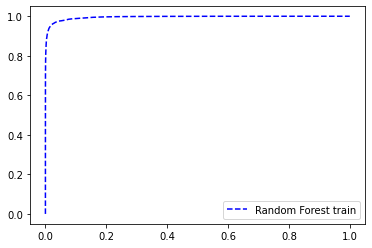

In [108]:
plt.plot(fpr, tpr,'b--',label ="Random Forest train")
plt.legend(loc='lower right')
plt.show()

In [109]:
y_prob2 = cross_val_predict(forest_clf, X_test, y_test_9, cv = 3, method = 'predict_proba')

In [110]:
y_scores2 = y_prob2[:,1]

In [111]:
y_scores2

array([0.  , 0.01, 0.  , ..., 0.22, 0.03, 0.02])

In [112]:
y_test_9

array([False, False, False, ..., False, False, False])

In [113]:
fpr2, tpr2, thresholds2 = roc_curve(y_test_9, y_scores2)

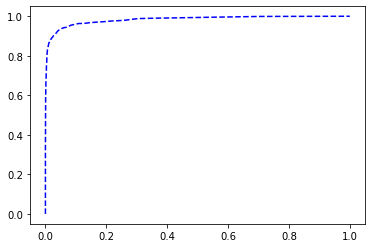

In [115]:
plt.plot(fpr2, tpr2, 'b--',label="Random Forest test")

In [17]:
import joblib

joblib.dump(forest_clf, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']